In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

air = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/REPASO 2022/data/airbnb.csv")

Mounted at /content/drive


In [36]:
air.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


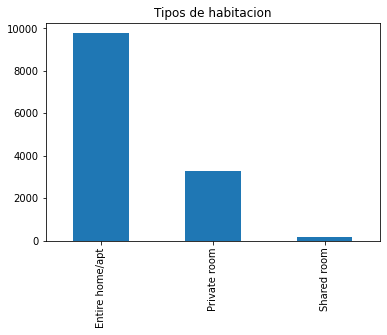

In [37]:
# Conteo de datos sobre room_type + grafico 
air['room_type'].value_counts().plot(

    # Tipo: de barras
    kind='bar',

    # Titulo del grafico
    title='Tipos de habitacion'
)

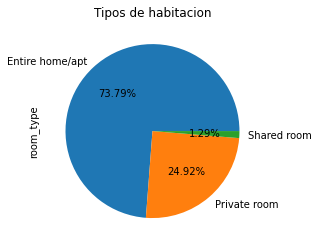

In [38]:
air['room_type'].value_counts().plot(
    kind='pie', 

    #Mostrar porcentaje, flotante, con 2 decimales + %
    autopct='%.2f%%' ,
    title='Tipos de habitacion'
)

In [39]:
type_review = air.groupby(['room_type', 'overall_satisfaction']).size()
type_review

room_type        overall_satisfaction
Entire home/apt  0.0                     2346
                 1.5                        1
                 2.0                        3
                 2.5                        8
                 3.0                       18
                 3.5                       82
                 4.0                      591
                 4.5                     3661
                 5.0                     3044
Private room     0.0                     1411
                 2.5                        5
                 3.0                       22
                 3.5                       69
                 4.0                      238
                 4.5                      893
                 5.0                      659
Shared room      0.0                       78
                 2.5                        1
                 3.0                        1
                 3.5                        3
                 4.0                      

In [40]:
type_review = type_review.reset_index()
type_review

,room_type,overall_satisfaction,0
0,Entire home/apt,0.0,2346
1,Entire home/apt,1.5,1
2,Entire home/apt,2.0,3
3,Entire home/apt,2.5,8
4,Entire home/apt,3.0,18
5,Entire home/apt,3.5,82
6,Entire home/apt,4.0,591
7,Entire home/apt,4.5,3661
8,Entire home/apt,5.0,3044
9,Private room,0.0,1411


In [41]:
type_review = pd.pivot_table(
    type_review, 
    columns='room_type', 
    index='overall_satisfaction', 
    values=0
)

type_review

room_type,Entire home/apt,Private room,Shared room
overall_satisfaction,,,
0.0,2346.0,1411.0,78.0
1.5,1.0,NaN,NaN
2.0,3.0,NaN,NaN
2.5,8.0,5.0,1.0
3.0,18.0,22.0,1.0
3.5,82.0,69.0,3.0
4.0,591.0,238.0,13.0
4.5,3661.0,893.0,51.0
5.0,3044.0,659.0,24.0


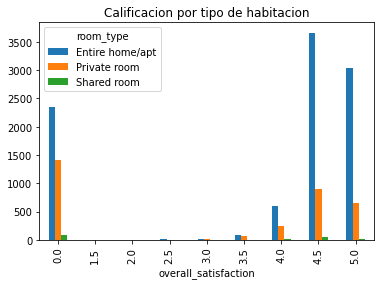

In [42]:
type_review.plot(
    kind="bar", 
    title="Calificacion por tipo de habitacion"
)

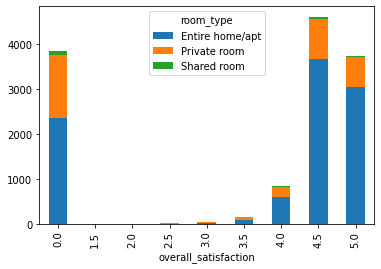

In [43]:
type_review.plot(
    kind="bar", 

    # Gráfico de barras apilada = True
    stacked=True
)

(array([ 628., 4005., 1269., 3731.,  892., 1568.,  259.,  389.,   85.,
         175.,   37.,   64.,   10.,   22.,   98.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16.]),
 <a list of 15 Patch objects>)

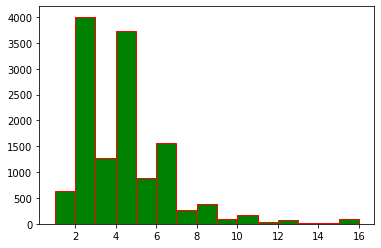

In [44]:
plt.hist(
    
    # Info a analizar
    air['accommodates'],

    # Dividir valores en un determinado numero de inervalos 
    15,

    # Color de las barras
    color="green",

    # Color de las lineas delimitadoras
    ec="red"
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


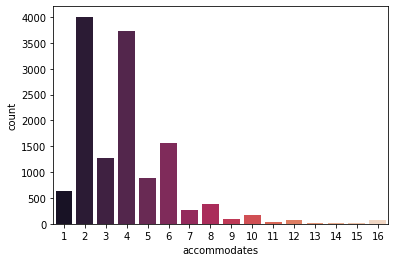

In [45]:
import seaborn as sns

sns.countplot(
    air['accommodates'], 

    # Color de barras. Mas info: https://seaborn.pydata.org/tutorial/color_palettes.html
    palette='rocket'
 )

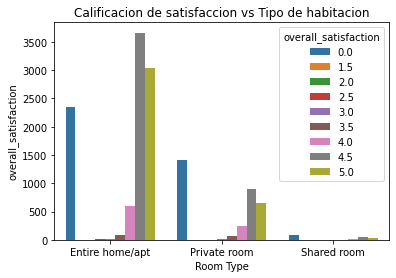

In [46]:
# Mas info: https://seaborn.pydata.org/generated/seaborn.countplot.html
grafico = sns.countplot(
    x="room_type",
    hue = "overall_satisfaction",
    palette = "tab10",
    data= air
)

grafico.set(
    title = "Calificacion de satisfaccion vs Tipo de habitacion",
    xlabel = "Room Type",
    ylabel = "overall_satisfaction"
)

plt.show()